In [1]:
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from elements.classes import ElementDataset

In [2]:
class_configs = [
    {"shape": None, "color": None, "texture": "solid"},
    {"shape": None, "color": "red", "texture": "solid"},
    {"shape": None, "color": "blue", "texture": "stripes_diagonal"},
    {"shape": None, "color": "green", "texture": "spots_polka"},
    {"shape": "circle", "color": None, "texture": "solid"},
    {"shape": "circle", "color": None, "texture": "spots_polka"},
    {"shape": "triangle", "color": "green", "texture": None},
    {"shape": "square", "color": "blue", "texture": None},
    {"shape": "triangle", "color": "red", "texture": "stripes_diagonal"},
    {"shape": "triangle", "color": "blue", "texture": "stripes_diagonal"},
    {"shape": "square", "color": "green", "texture": "spots_polka"},
    {"shape": "plus", "color": "magenta", "texture": "spots_polka"},
]

allowed_shapes = ['square', 'circle', 'triangle', 'plus']
allowed_colors = ['red', 'green', 'blue', 'magenta']
allowed_textures = ["solid", "spots_polka", "stripes_diagonal"]

allowed = {
    "shapes": allowed_shapes,
    "colors": allowed_colors,
    "textures": allowed_textures
}
dataset = ElementDataset(allowed, class_configs, 1000, 224, 4, 64, 42, 123)

In [3]:
dataset.config

{'allowed': {'shapes': ['square', 'circle', 'triangle', 'plus'],
  'colors': ['red', 'green', 'blue', 'magenta'],
  'textures': ['solid', 'spots_polka', 'stripes_diagonal']},
 'class_configs': [{'shape': None, 'color': None, 'texture': 'solid'},
  {'shape': None, 'color': 'red', 'texture': 'solid'},
  {'shape': None, 'color': 'blue', 'texture': 'stripes_diagonal'},
  {'shape': None, 'color': 'green', 'texture': 'spots_polka'},
  {'shape': 'circle', 'color': None, 'texture': 'solid'},
  {'shape': 'circle', 'color': None, 'texture': 'spots_polka'},
  {'shape': 'triangle', 'color': 'green', 'texture': None},
  {'shape': 'square', 'color': 'blue', 'texture': None},
  {'shape': 'triangle', 'color': 'red', 'texture': 'stripes_diagonal'},
  {'shape': 'triangle', 'color': 'blue', 'texture': 'stripes_diagonal'},
  {'shape': 'square', 'color': 'green', 'texture': 'spots_polka'},
  {'shape': 'plus', 'color': 'magenta', 'texture': 'spots_polka'}],
 'n': 1000,
 'img_size': 224,
 'element_n': 4,
 'e

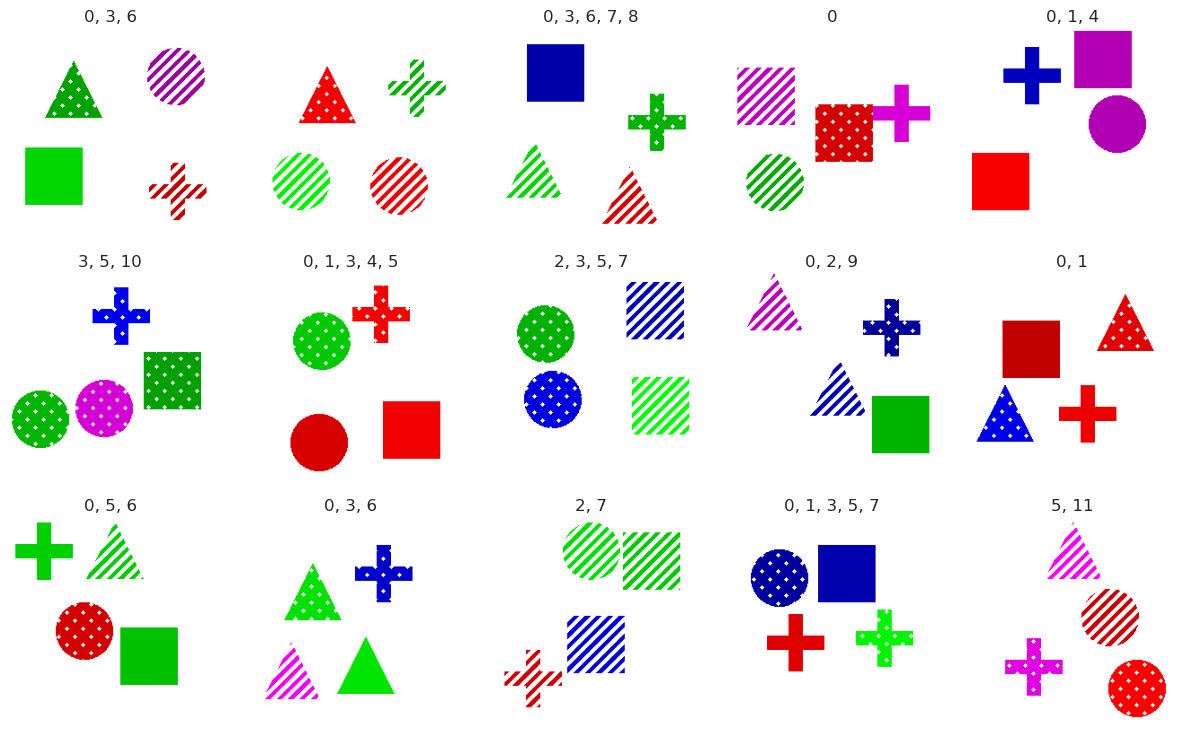

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = dataset.get_item(i)
    classes = img.class_labels
    classes = [str(v) for v in classes]
    ax.imshow(img.img)
    ax.set_title(", ".join(classes))
    ax.axis("off")
plt.show()

In [5]:
dataloader = DataLoader(dataset, 32)
labels = []
for sample in dataloader:
    labels.append(sample[1])
labels = np.concatenate(labels)
print("No. imgs per class")
print(labels.sum(axis=0))
print("No. classes per image")
print(np.unique(labels.sum(axis=1), return_counts=True)[1])

No. imgs per class
[802 275 309 306 264 330 228 231  86  75  71  79]
No. classes per image
[ 18  77 223 335 236  83  27   1]
